In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


## load data

In [4]:
from tensorflow.keras.datasets import mnist
import os
current_dir = os.getcwd()
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=current_dir+'/data/MNIST/mnist.npz')

x_train = x_train / 255
x_test = x_test / 255

print("x_train.shape",x_train.shape)

x_train.shape (60000, 28, 28)


9


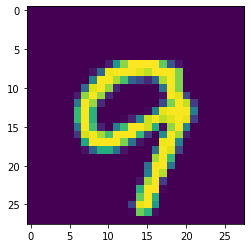

In [14]:
from matplotlib import pyplot as plt
import numpy as np
index = np.random.randint(0, high=59999, size=1)[0]
print(y_train[index])
plt.imshow(x_train[index])

## build and compile model

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## fit model

In [21]:
hist = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2968 - accuracy: 0.9132 - val_loss: 0.1353 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1420 - accuracy: 0.9574 - val_loss: 0.0997 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1076 - accuracy: 0.9674 - val_loss: 0.0884 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9726 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.0787 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0639 - accuracy: 0.9798 - val_loss: 0.0796 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0597 - accuracy: 0.9803 - val_loss: 0.0741 - val_accuracy:

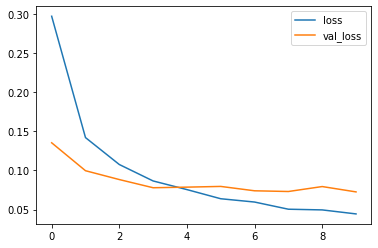

In [22]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

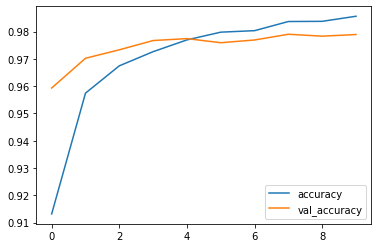

In [23]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()

## model evaluation

In [24]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 0s 946us/step - loss: 0.0726 - accuracy: 0.9789
[0.07263606786727905, 0.9789000153541565]


confusion matrix without normalization
[[ 968    0    0    3    1    0    2    1    4    1]
 [   0 1122    3    1    0    0    2    1    6    0]
 [   3    2 1013    0    1    0    2    5    6    0]
 [   0    0    7  985    1    5    0    5    5    2]
 [   0    0    4    0  960    0    5    0    2   11]
 [   2    0    0    8    0  872    3    2    4    1]
 [   4    3    0    1    2    9  937    0    2    0]
 [   3    0    9    3    1    0    0 1008    1    3]
 [   4    0    3    4    3    3    1    5  949    2]
 [   1    3    0    3    7    6    1    9    4  975]]


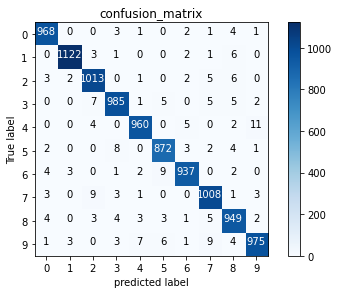

In [32]:
#!pip install scikit-learn
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title="confusion_matrix",cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("normalized confusion matrix")
    else:
        print("confusion matrix without normalization")
        
    print(cm)
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    threshold = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                 horizontalalignment= "center",
                 color="white" if cm[i,j]> threshold else "black"
                )
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    plt.show()
        
p_test = model. predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))

## error analysis

Text(0.5, 1.0, 'True label: 3 predicted: 2')

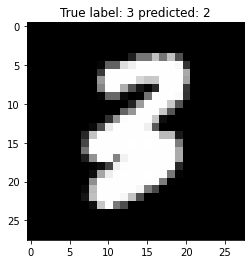

In [43]:
miss_classified_index = np.where(p_test != y_test)[0]
i = np.random.choice(miss_classified_index)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s predicted: %s'%(y_test[i],p_test[i]))